In [1]:
import matplotlib.pyplot as plt 
from cmtj import Junction, Layer, CVector, Axis, ScalarDriver, AxialDriver, NullDriver
import numpy as np 
import pandas as pd 
import time 

from mpl_toolkits.mplot3d import Axes3D

def norm(x):
    return np.asarray(x)/np.linalg.norm(x)

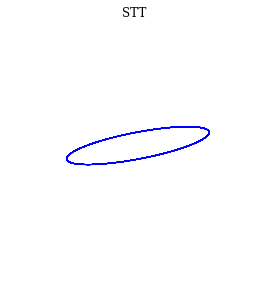

In [2]:
demagTensor = [
    CVector(0., 0., 0.),
    CVector(0., 0., 0.),
    CVector(0., 0., 1.0)
]
dipoleTensor = [
    CVector(5.57049776248663e-4, 0., 0.),
    CVector(0., 0.00125355500286346, 0.),
    CVector(0., 0.0, -0.00181060482770131)
]

damping = 0.03
currentDensity = 1e10
beta = 1
spinPolarisation = 1.0

l1 = Layer.createSTTLayer(id="free", 
           mag=CVector(0., 0., -1.), 
           anis=CVector(0, 0., 1.), 
           Ms=1.2,
           thickness=1.4e-9, 
           cellSurface=7e-10 * 7e-10, 
           demagTensor=demagTensor, 
           dipoleTensor=dipoleTensor,
           damping=damping,
           SlonczewskiSpacerLayerParameter=1.0,
           spinPolarisation=spinPolarisation,
           beta=beta)

l1.setReferenceLayer(CVector(0, 1., 1.))
junction = Junction([l1])

junction.setLayerAnisotropyDriver("free", ScalarDriver.getConstantDriver(800e3))
junction.setLayerCurrentDriver("free", ScalarDriver.getConstantDriver(currentDensity))

junction.runSimulation(2e-9, 1e-12, 1e-12, False, False)
log = junction.getLog()
with plt.style.context(['science', 'no-latex']):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_title("STT")
    ax.plot3D(norm(log[f'free_mx']),
              norm(log[f'free_my']),
              norm(log[f'free_mz']), color='blue')
    ax.set_axis_off()

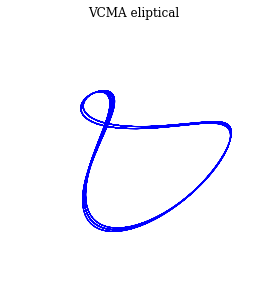

In [3]:
demagTensor = [
    CVector(0., 0., 0.),
    CVector(0., 0., 0.),
    CVector(0., 0., 1.0)
]
dipoleTensor = [
    CVector(5.57049776248663e-4, 0., 0.),
    CVector(0., 0.00125355500286346, 0.),
    CVector(0., 0.0, -0.00181060482770131)
]

damping = 0.03

l1 = Layer.createSTTLayer(id="free", 
           mag=CVector(0., 0., -1.), 
           anis=CVector(0, 0., 1.), 
           Ms=1.2,
           thickness=1.4e-9, 
           cellSurface=7e-10 * 7e-10, 
           demagTensor=demagTensor, 
           dipoleTensor=dipoleTensor,
           damping=damping)
junction = Junction([l1])

junction.setLayerExternalFieldDriver("free", 
    AxialDriver(
        NullDriver(),
        ScalarDriver.getConstantDriver(300e3),
        NullDriver()
    )
)
junction.setLayerAnisotropyDriver("free", ScalarDriver.getSineDriver(800e3, 10e3, 7e9, 0))

junction.runSimulation(2e-9, 1e-12, 1e-12, False, False)
log = junction.getLog()
with plt.style.context(['science', 'no-latex']):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_title("VCMA eliptical")
    ax.plot3D(norm(log[f'free_mx']),
              norm(log[f'free_my']),
              norm(log[f'free_mz']), color='blue')
    ax.set_axis_off()

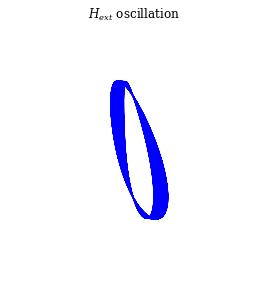

In [4]:
demagTensor = [
    CVector(0., 0., 0.),
    CVector(0., 0., 0.),
    CVector(0., 0., 1.0)
]
dipoleTensor = [
    CVector(5.57049776248663e-4, 0., 0.),
    CVector(0., 0.00125355500286346, 0.),
    CVector(0., 0.0, -0.00181060482770131)
]

damping = 0.03

l1 = Layer.createSTTLayer(id="free", 
           mag=CVector(0., 0., -1.), 
           anis=CVector(0, 0., 1.), 
           Ms=1.2,
           thickness=1.4e-9, 
           cellSurface=7e-10 * 7e-10, 
           demagTensor=demagTensor, 
           dipoleTensor=dipoleTensor,
           damping=damping)

junction = Junction([l1])

junction.setLayerExternalFieldDriver("free", 
    AxialDriver(
        ScalarDriver.getConstantDriver(500e3),
        ScalarDriver.getSineDriver(300e3, 40e3, 0.4e9, 0),
        NullDriver()
    )
)
junction.setLayerAnisotropyDriver("free", ScalarDriver.getConstantDriver(600e3))

junction.runSimulation(2e-9, 1e-12, 1e-12, False, False)
log = junction.getLog()
with plt.style.context(['science', 'no-latex']):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_title("$H_{ext}$ oscillation")
    ax.plot3D(norm(log[f'free_mx']),
              norm(log[f'free_my']),
              norm(log[f'free_mz']), color='blue')
    ax.set_axis_off()

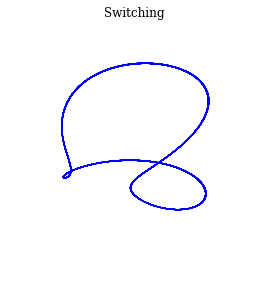

In [5]:
demagTensor = [
    CVector(0., 0., 0.),
    CVector(0., 0., 0.),
    CVector(0., 0., 1.0)
]
dipoleTensor = [
    CVector(5.57049776248663e-4, 0., 0.),
    CVector(0., 0.00125355500286346, 0.),
    CVector(0., 0.0, -0.00181060482770131)
]

damping = 0.03

l1 = Layer.createSTTLayer(id="free", 
           mag=CVector(0., 0., 1.), 
           anis=CVector(1, 0., 0.), 
           Ms=1.2,
           thickness=1.4e-9, 
           cellSurface=7e-10 * 7e-10, 
           demagTensor=demagTensor, 
           dipoleTensor=dipoleTensor,
           damping=damping)

junction = Junction([l1])

junction.setLayerExternalFieldDriver("free", 
    AxialDriver(
        NullDriver(),
        ScalarDriver.getConstantDriver(500e3),
        NullDriver()
    )
)
junction.setLayerAnisotropyDriver("free", ScalarDriver.getConstantDriver(600e3))

junction.runSimulation(2e-9, 1e-12, 1e-12, False, False)
log = junction.getLog()
with plt.style.context(['science', 'no-latex']):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_title("Switching")
    ax.plot3D(norm(log[f'free_mx']),
              norm(log[f'free_my']),
              norm(log[f'free_mz']), color='blue')
    ax.set_axis_off()